# Decision Tree

Name: Arthur Pontes Nader

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Chosen Dataset
The file diabetes_prediction_dataset.csv contains medical data of patients, as well as their diabetes status, which is divided into two classes: positive (1) or negative (0). Among the various attributes, the following stand out: age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.

The dataset comprises 100,000 instances.

Available at: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

## Preprocessing

In [2]:
data = pd.read_csv("diabetes_prediction_dataset.csv")
data.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

In [3]:
#The response variable is diabetes - the last one in the dataframe
#Putting the response variable as the first column

data.set_index(data.columns[-1], inplace=True)
data.reset_index(inplace=True)
data.head()

diabetes  gender   age  hypertension  heart_disease smoking_history    bmi  \
0         0  Female  80.0             0              1           never  25.19   
1         0  Female  54.0             0              0         No Info  27.32   
2         0    Male  28.0             0              0           never  27.32   
3         0  Female  36.0             0              0         current  23.45   
4         0    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  
0          6.6                  140  
1          6.6                   80  
2          5.7                  158  
3          5.0                  155  
4          4.8                  155

#### Categorical Variables

It is observed that the classes are already defined in numerical terms, 1 for the presence of diabetes and 0 for absence.

#### Dummy

It is noted that there are two categorical variables: gender and smoking_history. Thus, we need to transform them into numerical values using the get_dummies method.

In [4]:
data = pd.get_dummies(data, columns=['gender', 'smoking_history'])
data.head()

diabetes   age  hypertension  heart_disease    bmi  HbA1c_level  \
0         0  80.0             0              1  25.19          6.6   
1         0  54.0             0              0  27.32          6.6   
2         0  28.0             0              0  27.32          5.7   
3         0  36.0             0              0  23.45          5.0   
4         0  76.0             1              1  20.14          4.8   

   blood_glucose_level  gender_Female  gender_Male  gender_Other  \
0                  140           True        False         False   
1                   80           True        False         False   
2                  158          False         True         False   
3                  155           True        False         False   
4                  155          False         True         False   

   smoking_history_No Info  smoking_history_current  smoking_history_ever  \
0                    False                    False                 False   
1                     True                    False                 False   
2                    False                    False                 False   
3                    False                     True                 False   
4                    False                     True                 False   

   smoking_history_former  smoking_history_never  smoking_history_not current  
0                   False                   True                        False  
1                   False                  False                        False  
2                   False                   True                        False  
3                   False                  False                        False  
4                   False                  False                        False

#### NA Values (missing values)
Now, let's assess whether there are any NA (not assigned - missing values) in the dataset.

In [6]:
print(data.shape)
data = data.dropna()
print(data.shape)

(100000, 16)
(100000, 16)


#### Z-normalization

In [8]:
data.iloc[:,1:] = (data.iloc[:,1:] - data.iloc[:,1:].mean())/data.iloc[:,1:].std(ddof=1)
data.head()

diabetes       age  hypertension  heart_disease       bmi  HbA1c_level  \
0         0  1.692695     -0.284438       4.936354 -0.321054     1.001701   
1         0  0.538004     -0.284438      -0.202577 -0.000116     1.001701   
2         0 -0.616688     -0.284438      -0.202577 -0.000116     0.161107   
3         0 -0.261398     -0.284438      -0.202577 -0.583229    -0.492688   
4         0  1.515050      3.515669       4.936354 -1.081965    -0.679486   

   blood_glucose_level  gender_Female  gender_Male  gender_Other  \
0             0.047704       0.841354    -0.841042     -0.013418   
1            -1.426203       0.841354    -0.841042     -0.013418   
2             0.489876      -1.188548     1.188989     -0.013418   
3             0.416181       0.841354    -0.841042     -0.013418   
4             0.416181      -1.188548     1.188989     -0.013418   

   smoking_history_No Info  smoking_history_current  smoking_history_ever  \
0                -0.747004                -0.319945             -0.204229   
1                 1.338667                -0.319945             -0.204229   
2                -0.747004                -0.319945             -0.204229   
3                -0.747004                 3.125508             -0.204229   
4                -0.747004                 3.125508             -0.204229   

   smoking_history_former  smoking_history_never  smoking_history_not current  
0               -0.321197               1.359923                    -0.262511  
1               -0.321197              -0.735328                    -0.262511  
2               -0.321197               1.359923                    -0.262511  
3               -0.321197              -0.735328                    -0.262511  
4               -0.321197              -0.735328                    -0.262511

#### Visualizing the variables

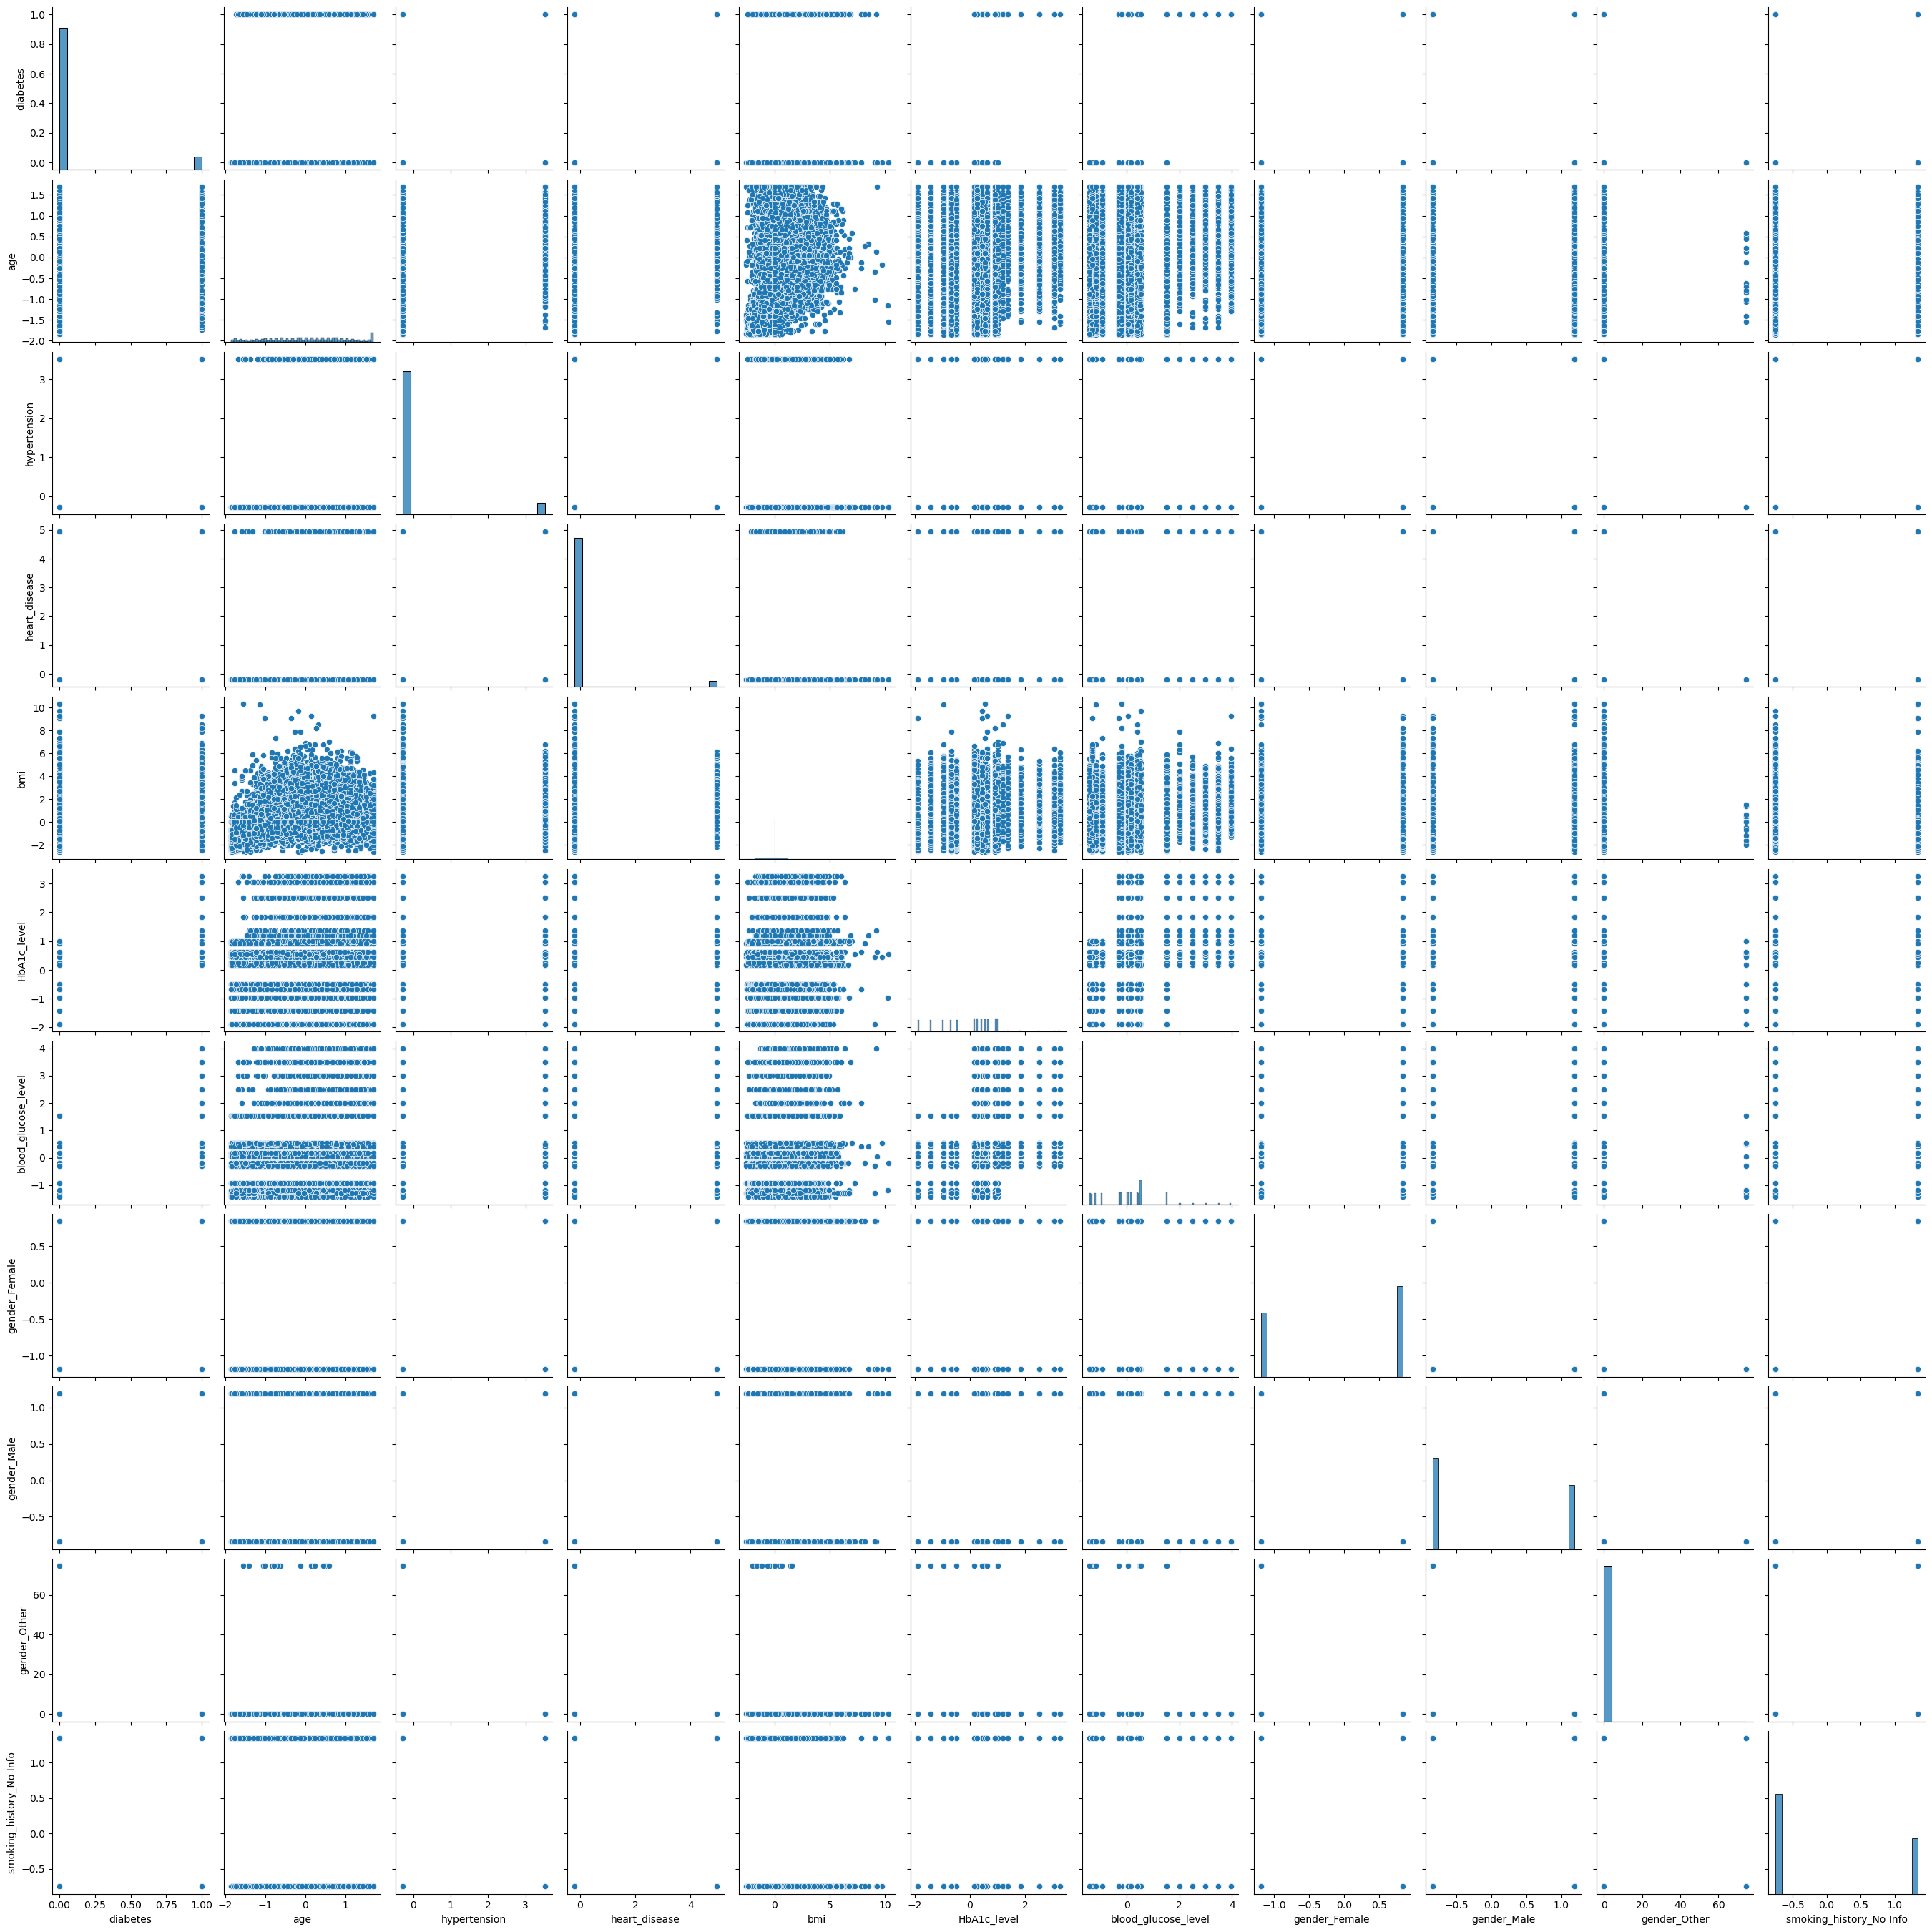

In [9]:
sns.pairplot(data.iloc[:,:11])

#### Variable separation

Predictor variables are stored in X and the response variable in y

In [10]:
X, y = data.iloc[:,1:].values, data.iloc[:,0].values

In [12]:
X, y

(array([[ 1.69269508, -0.28443802,  4.93635391, ..., -0.32119662,
          1.35992289, -0.26251118],
        [ 0.53800374, -0.28443802, -0.20257664, ..., -0.32119662,
         -0.73532846, -0.26251118],
        [-0.6166876 , -0.28443802, -0.20257664, ..., -0.32119662,
          1.35992289, -0.26251118],
        ...,
        [ 1.0709382 , -0.28443802, -0.20257664, ...,  3.11332668,
         -0.73532846, -0.26251118],
        [-0.79433242, -0.28443802, -0.20257664, ..., -0.32119662,
          1.35992289, -0.26251118],
        [ 0.67123735, -0.28443802, -0.20257664, ..., -0.32119662,
         -0.73532846, -0.26251118]]),
 array([0, 0, 0, ..., 0, 0, 0]))

## Decision tree

In [177]:
def plot_tree_decision_regions(X, y, criterion="gini", max_depth=None, min_samples_leaf=1):
    
    plt.figure(figsize=(15,5))

    # Parameters
    plot_colors = "rb"
    plot_step = 0.02

    pairs_list = []
    for i in range(1, 4):
        for j in range(i+1, 4):
            pairs_list.append([i,j])

    for pairidx, pair in enumerate(pairs_list):

        X = data.iloc[:, pair].to_numpy()
        y = data.iloc[:, 0].to_numpy()

        # Train
        clf = tree.DecisionTreeClassifier(criterion=criterion, 
                                          max_depth=max_depth, 
                                          min_samples_leaf=min_samples_leaf).fit(X, y)

        # Plot the decision boundary
        plt.subplot(1, 3, pairidx + 1)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu)

        plt.xlabel(data.columns[pair[0]])
        plt.ylabel(data.columns[pair[1]])

        # Plot the training points    
        for l, c in zip(np.unique(y), plot_colors):
            plt.scatter(X[y == l, 0], X[y == l, 1], color=c, label=f'Class {l}', edgecolor='black', s=15)

    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    plt.show()

# Example usage with a hypothetical DataFrame 'data'
# plot_tree_decision_regions(data)


#### Creating the decision tree

In [16]:
model = tree.DecisionTreeClassifier(criterion = "gini", max_depth=8, min_samples_leaf=1)
model.fit(X, y)
model.get_depth()

8

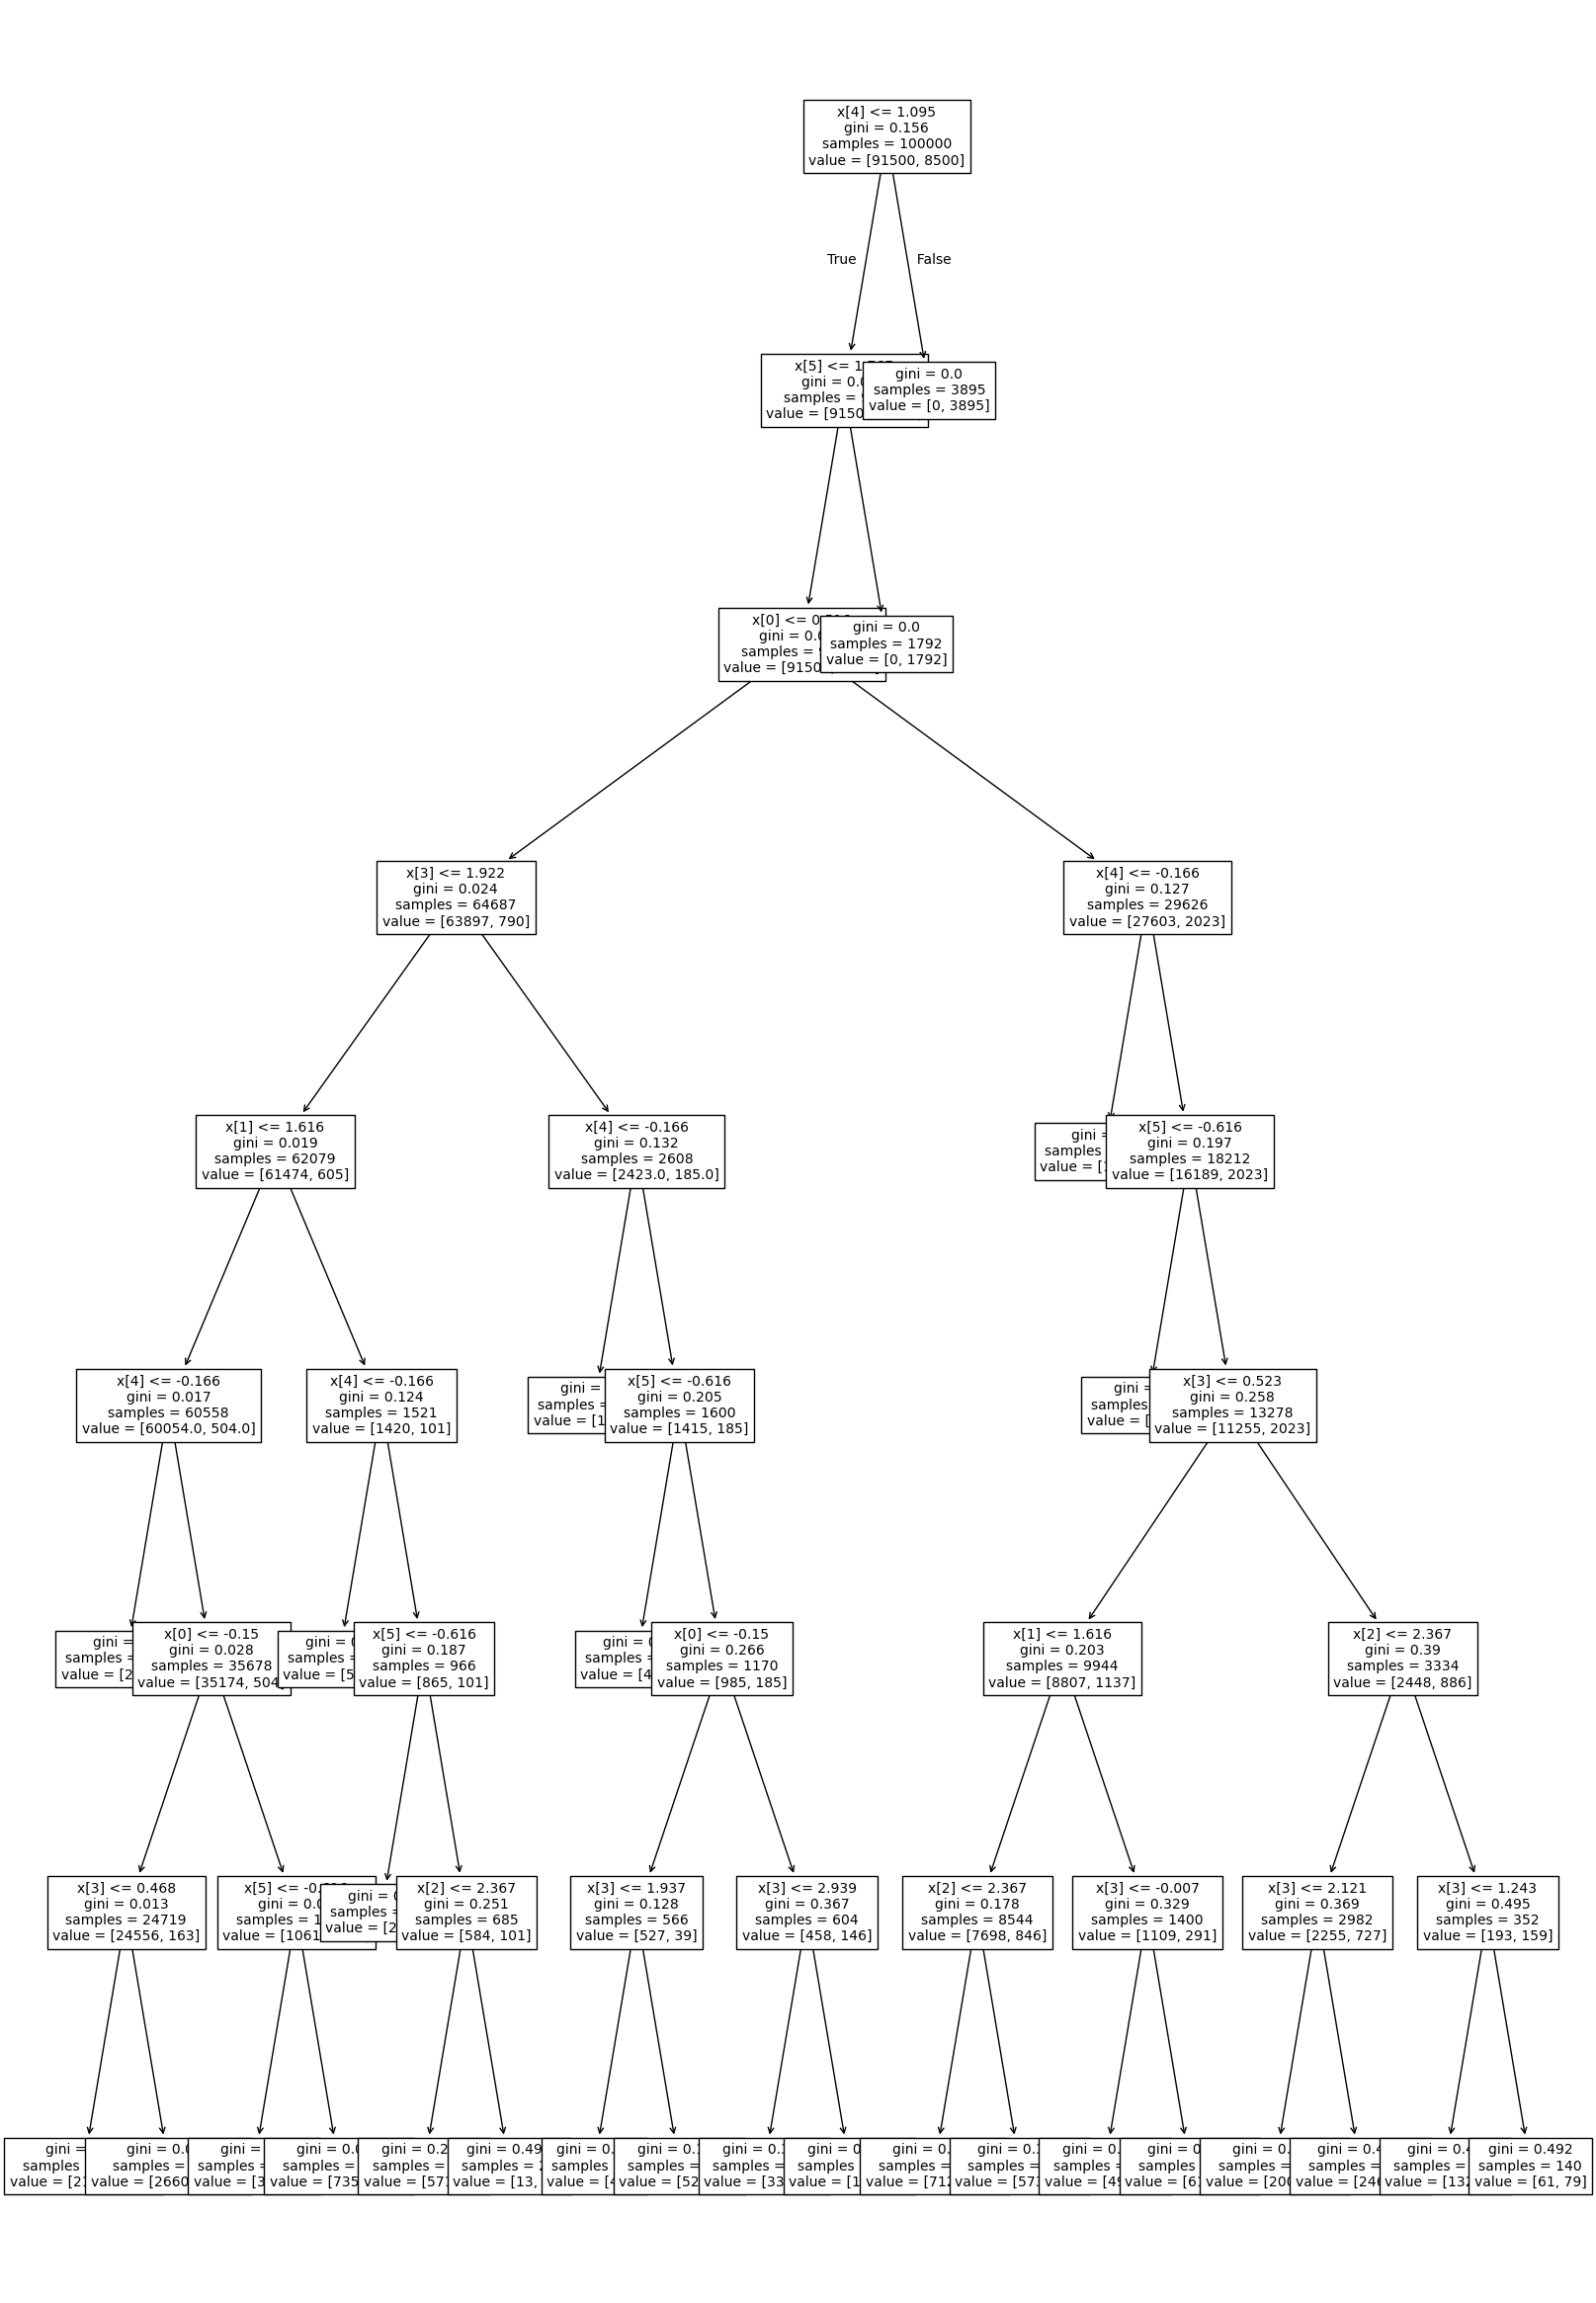

In [17]:
plt.figure(figsize=(20,30))
tree.plot_tree(model, fontsize=10)
plt.show()

#### Decision regions

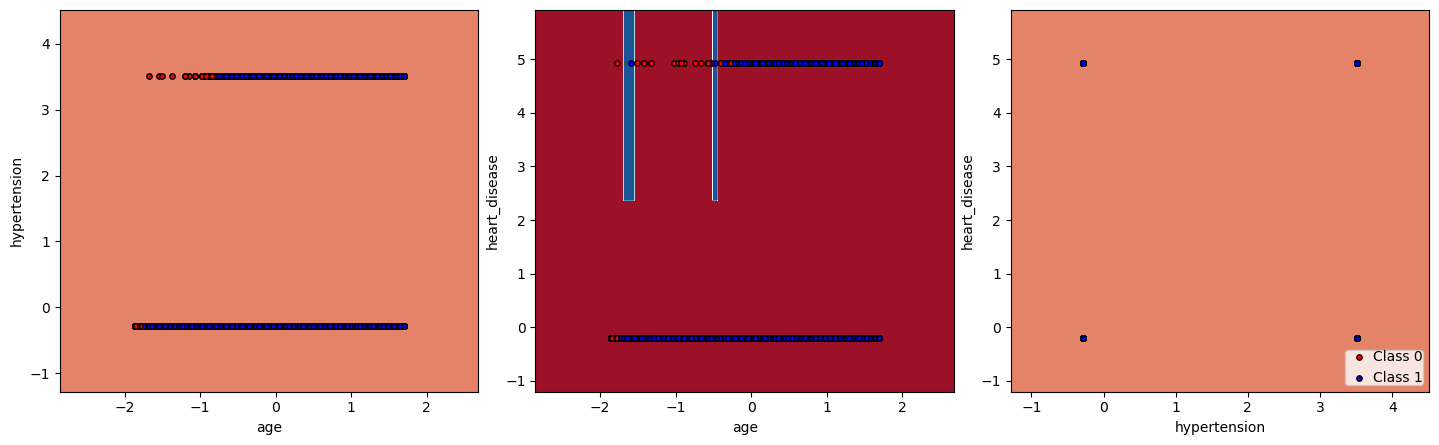

In [178]:
plot_tree_decision_regions(X, y, "gini")

## Train and test

Now, we split the dataset into two sets: train (85%) and test (15%)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=0)

In [133]:
model = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [134]:
model.score(X_test, y_test)

0.9708

In [135]:
y_pred = model.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[13725     0]
 [  438   837]]
Accuracy: 0.9708


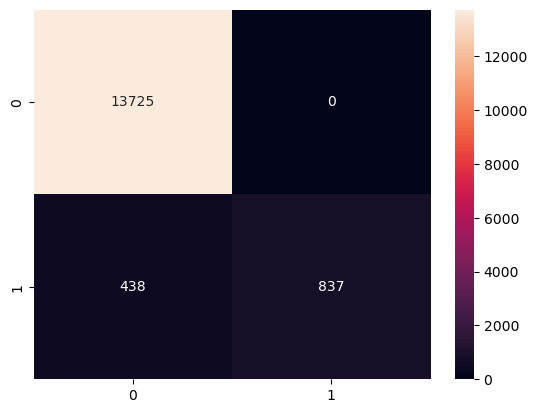

In [136]:
sns.heatmap(cf_matrix, fmt='d', annot=True);

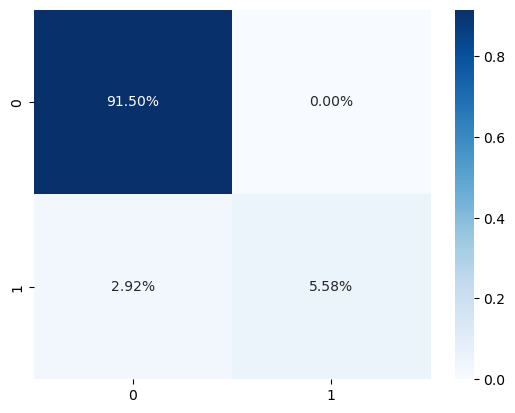

In [137]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues');

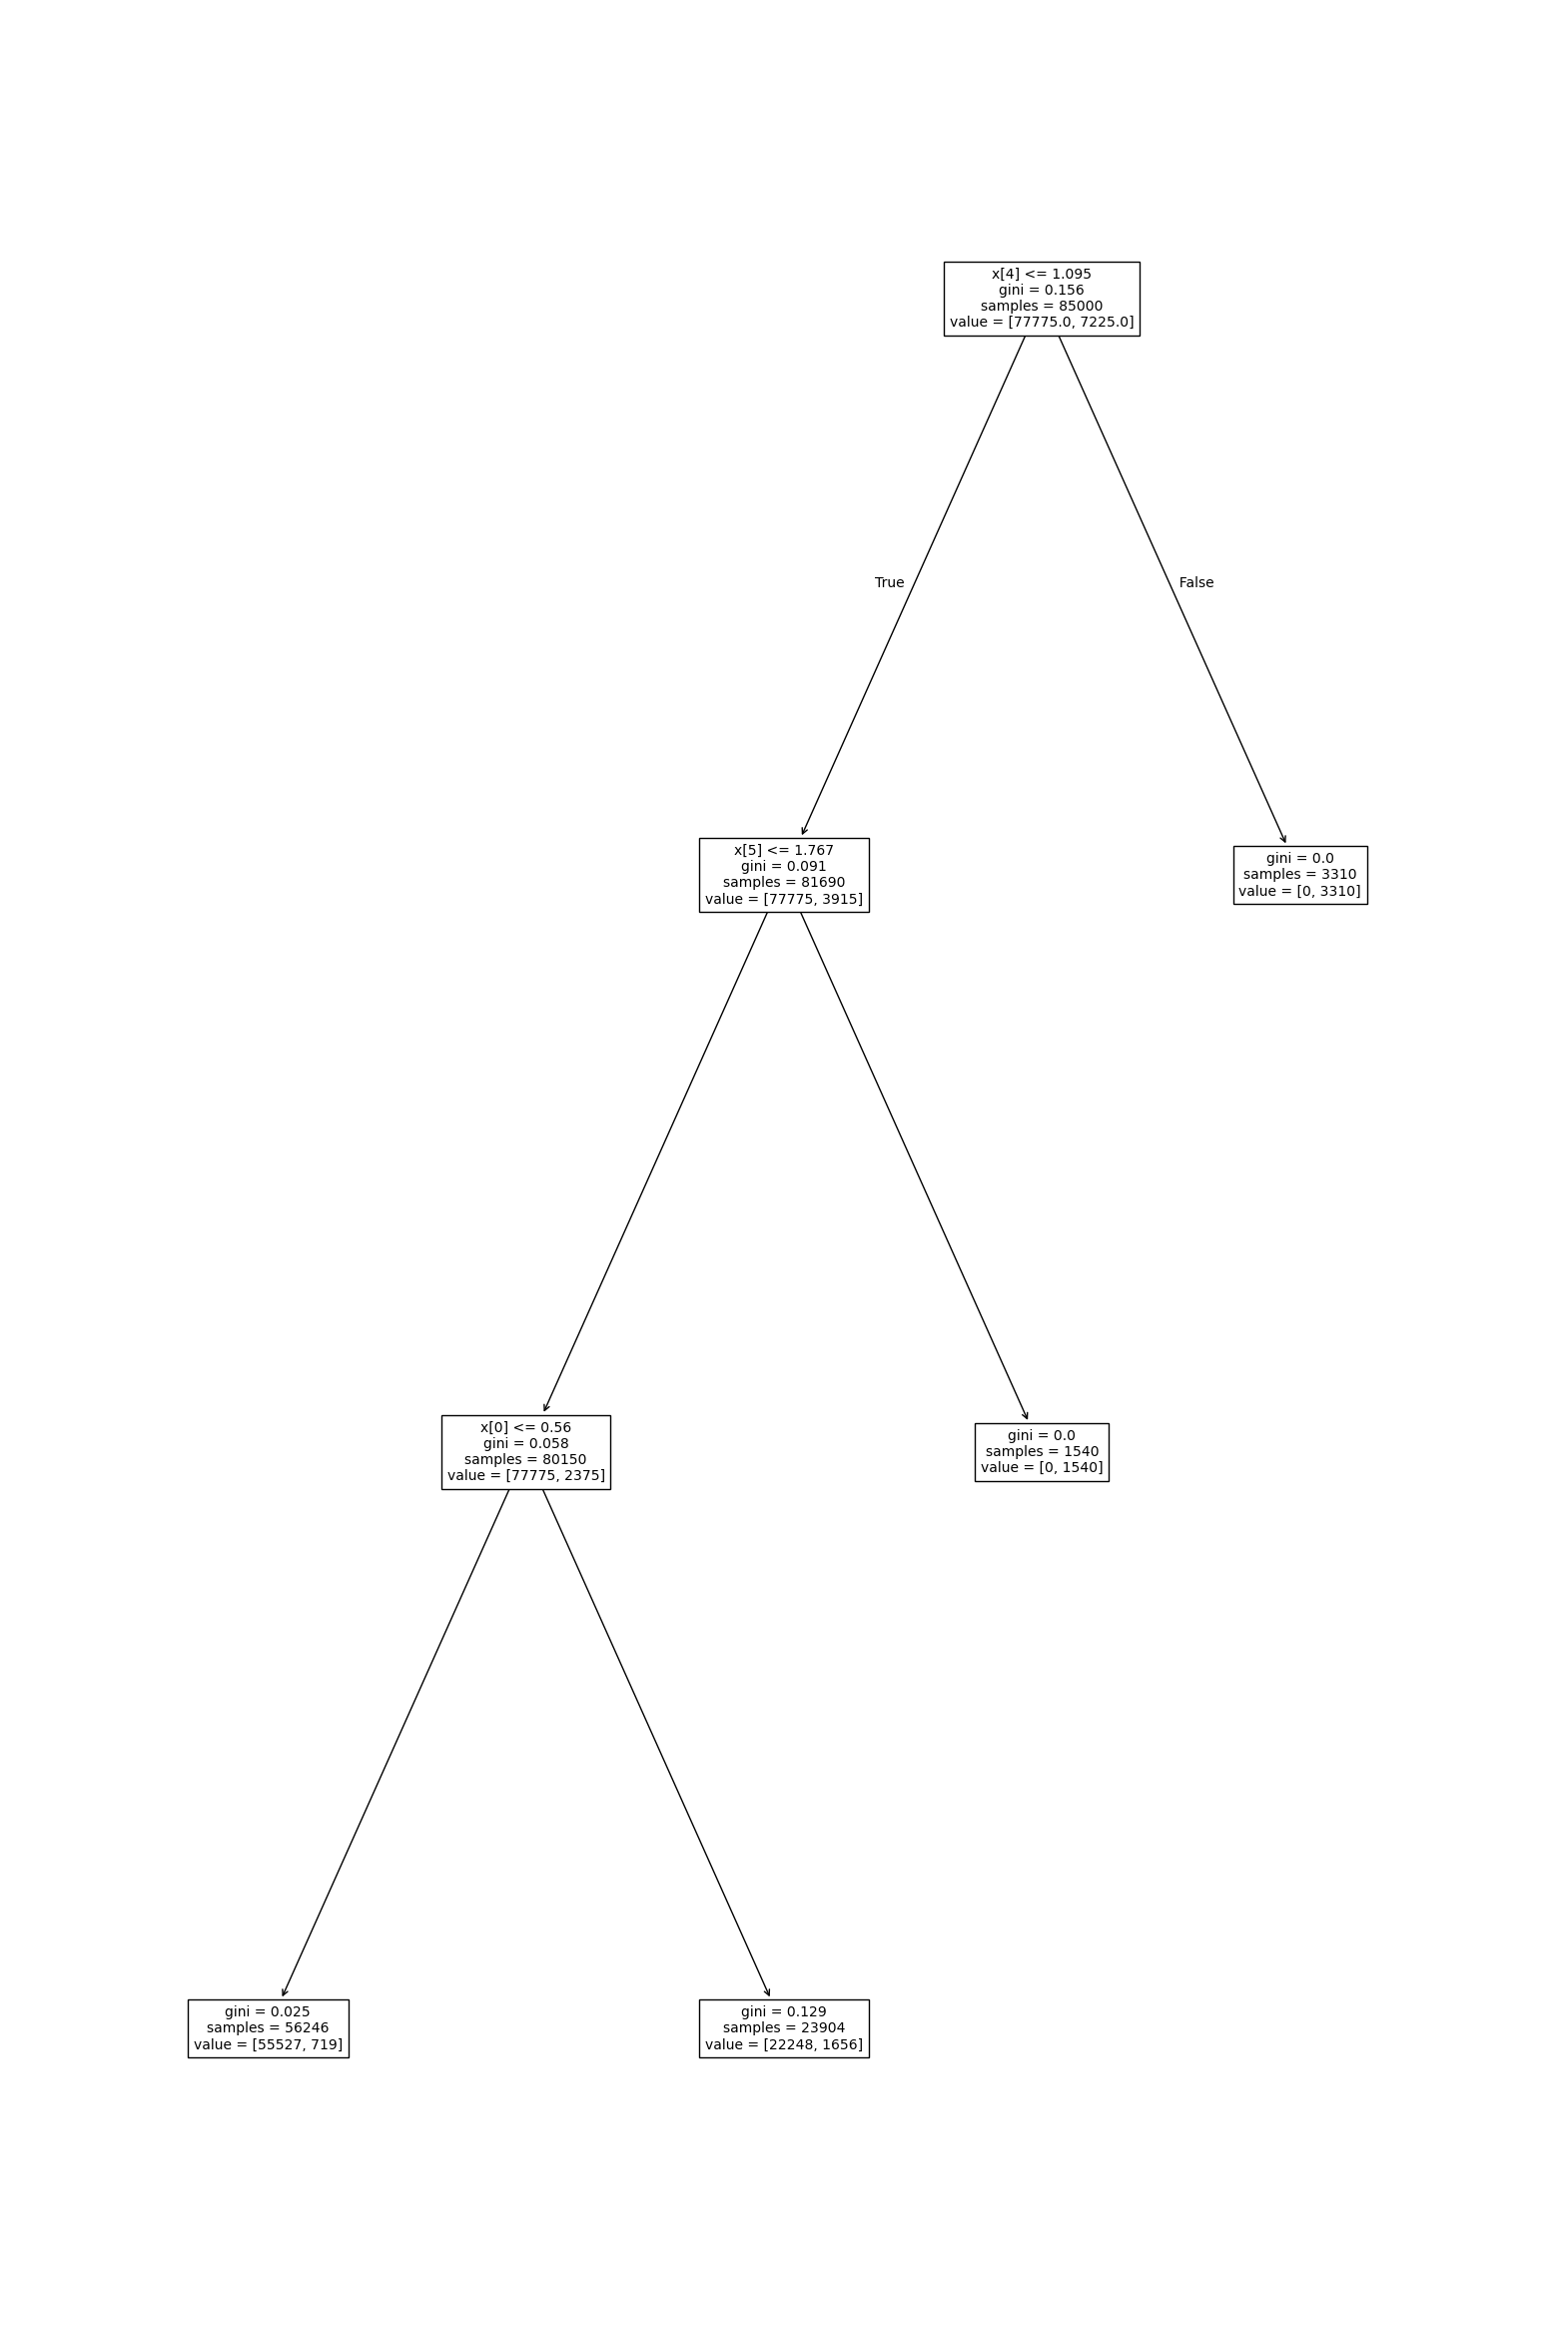

In [138]:
plt.figure(figsize=(20,30))
tree.plot_tree(model, fontsize=10)
plt.show()